TASK 6: HOUSE PRICE PREDICTION USING CALIFORNIA HOUSING DATASET

1. LOADING THE DATASET
----------------------------------------
✅ California Housing Dataset loaded successfully!
Dataset source: California Housing dataset from sklearn
Target variable: House prices in hundreds of thousands of dollars

Dataset shape: (20640, 9)
Features: 8
Samples: 20640

Feature Descriptions:
• MedInc: Median income in block group
• HouseAge: Median house age in block group
• AveRooms: Average number of rooms per household
• AveBedrms: Average number of bedrooms per household
• Population: Block group population
• AveOccup: Average number of household members
• Latitude: Block group latitude
• Longitude: Block group longitude
• PRICE: Median house value in hundreds of thousands of dollars (TARGET)

2. DATA EXPLORATION AND PREPROCESSING
--------------------------------------------------

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 column

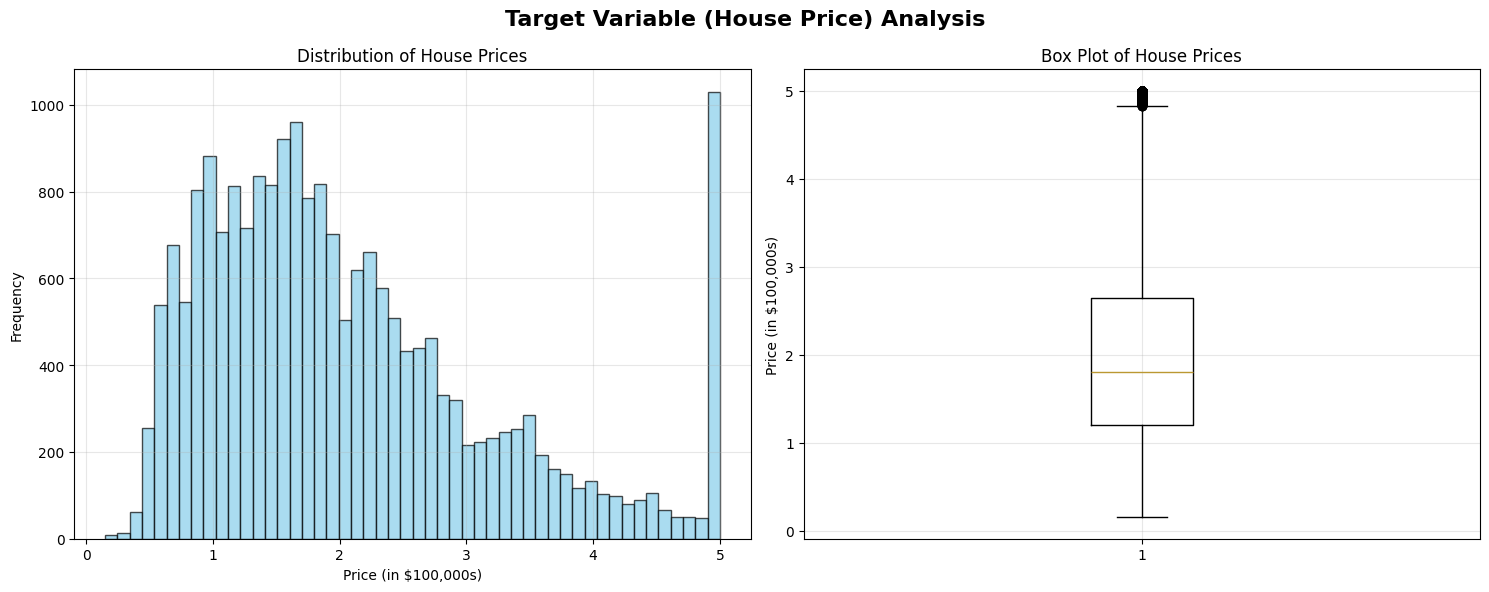

Price Statistics:
• Mean Price: $207k
• Median Price: $180k
• Min Price: $15k
• Max Price: $500k
• Standard Deviation: $115k

3.2 Feature correlation analysis...


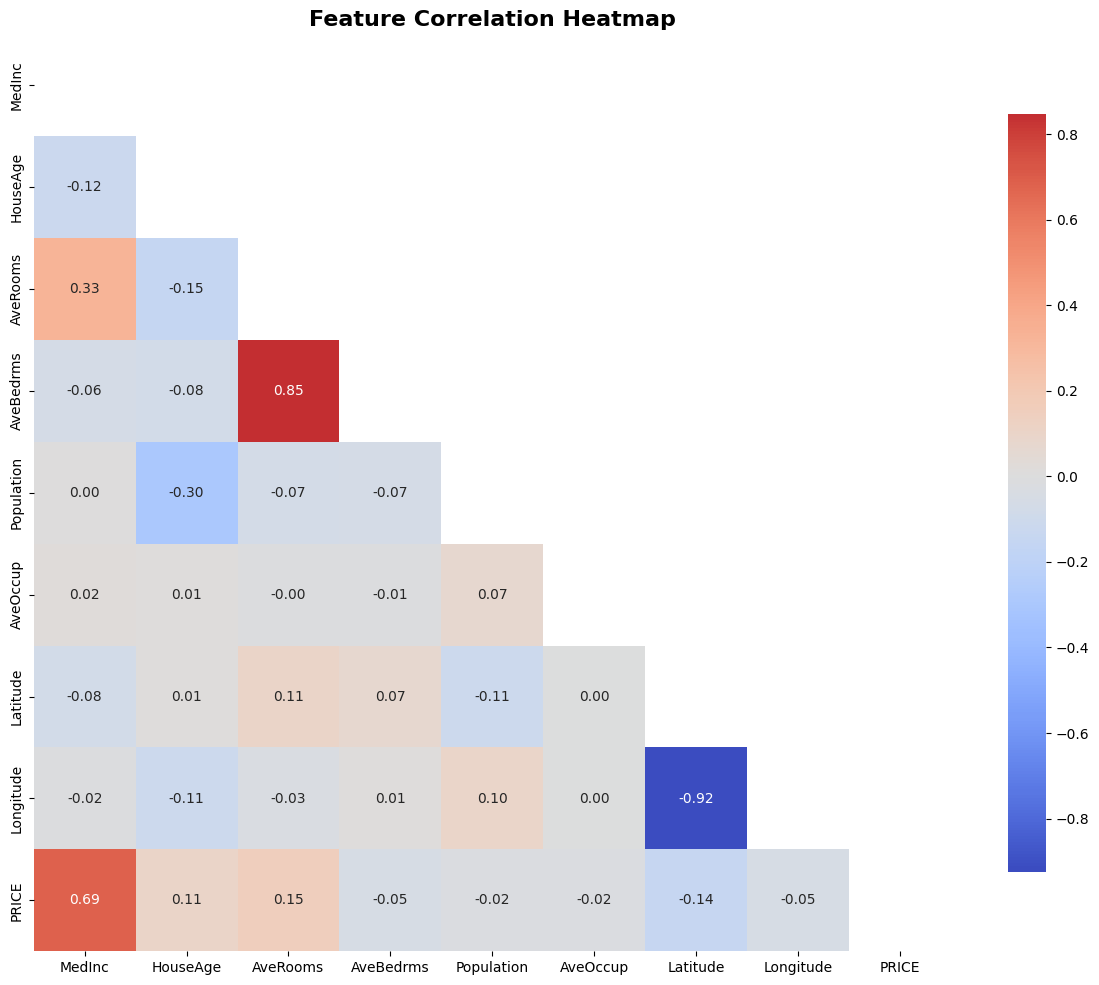


Top features correlated with PRICE:
• MedInc: 0.688
• AveRooms: 0.152
• Latitude: 0.144
• HouseAge: 0.106
• AveBedrms: 0.047

3.3 Analyzing feature relationships with price...


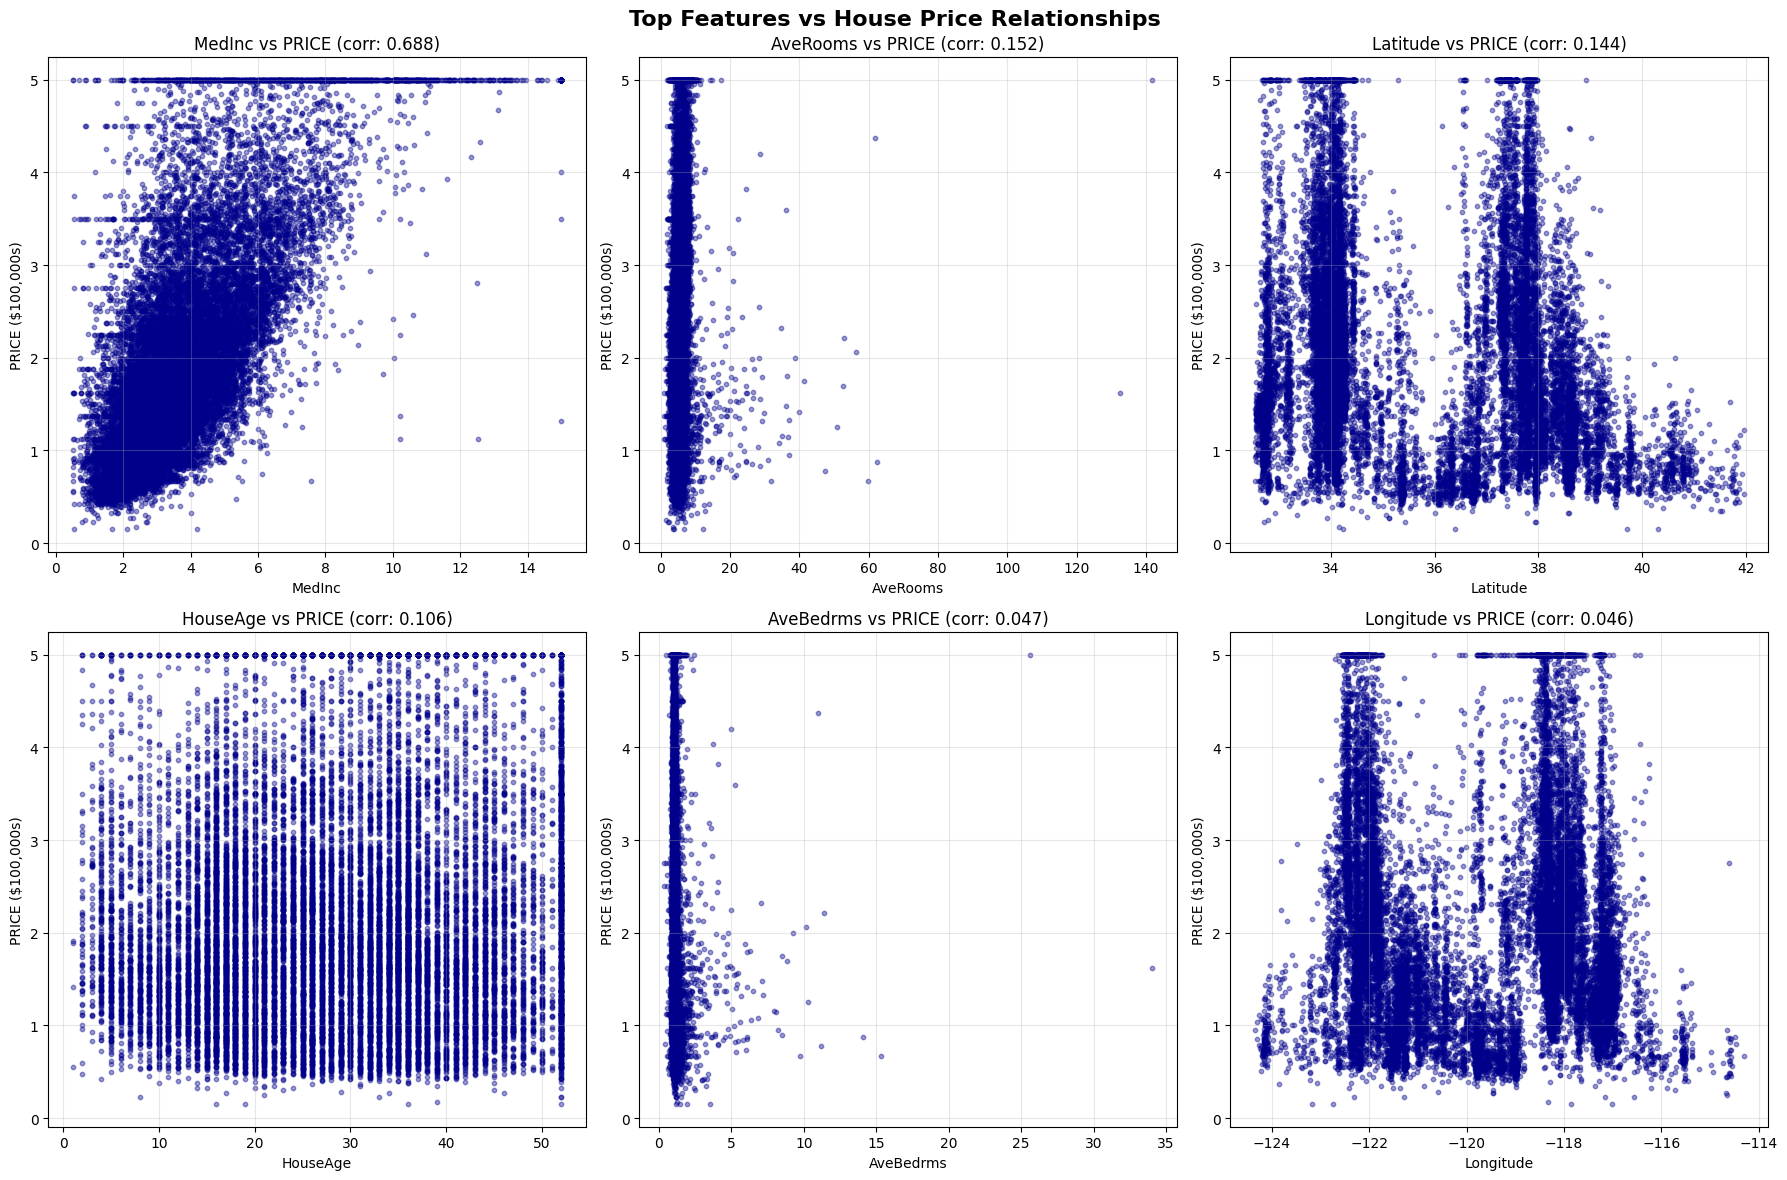


3.4 Geographic price distribution...


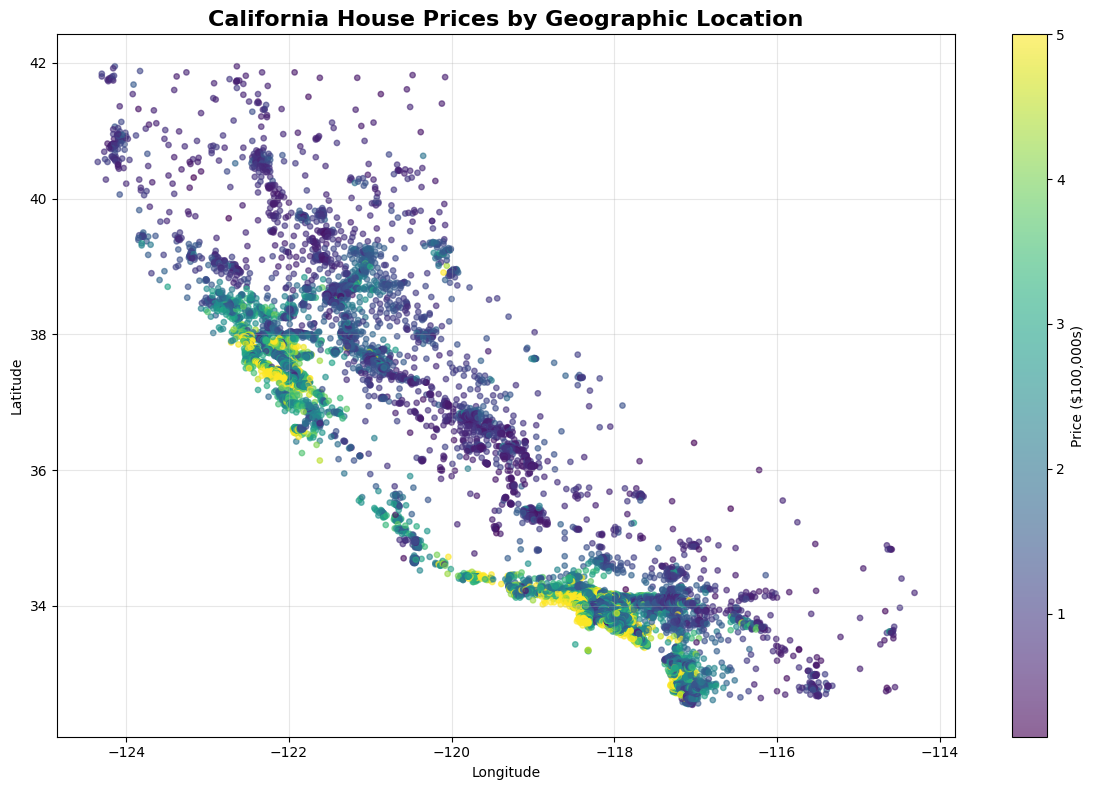


3.5 Analyzing feature distributions...


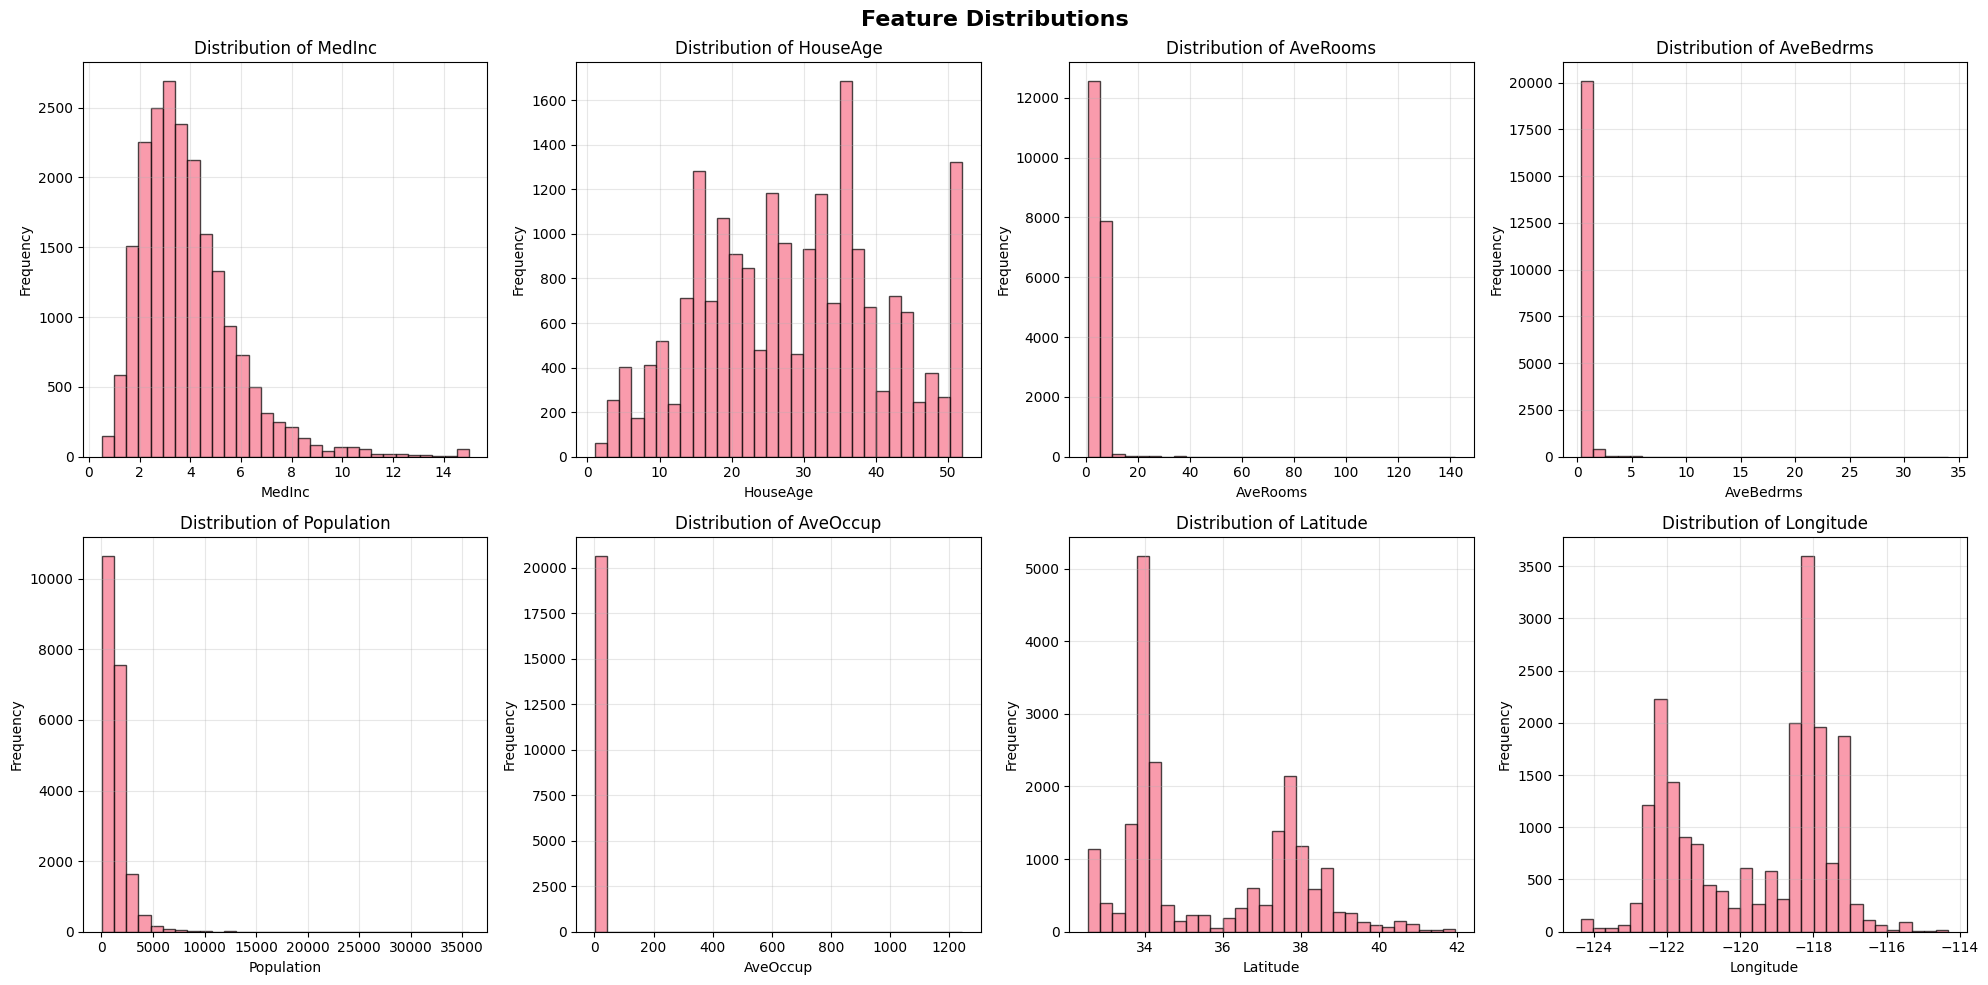


4. FEATURE PREPROCESSING
-----------------------------------
Features shape: (20640, 8)
Target shape: (20640,)

Data split:
• Training set: 16512 samples
• Test set: 4128 samples
✅ Features scaled using StandardScaler

5. MODEL TRAINING AND EVALUATION
---------------------------------------------
Training models...

🔄 Training Linear Regression...
✅ Linear Regression trained successfully!
   Test MAE: $53k
   Test RMSE: $75k
   Test R²: 0.576

🔄 Training Random Forest...
✅ Random Forest trained successfully!
   Test MAE: $33k
   Test RMSE: $51k
   Test R²: 0.805

🔄 Training Gradient Boosting...
✅ Gradient Boosting trained successfully!
   Test MAE: $37k
   Test RMSE: $54k
   Test R²: 0.776

6. MODEL COMPARISON
------------------------------
Model Performance Comparison:
               Model  Test_MAE  Test_RMSE  Test_R2
0  Linear Regression      53.3       74.6      0.6
1      Random Forest      32.8       50.5      0.8
2  Gradient Boosting      37.2       54.2      0.8

🏆 Best Model:

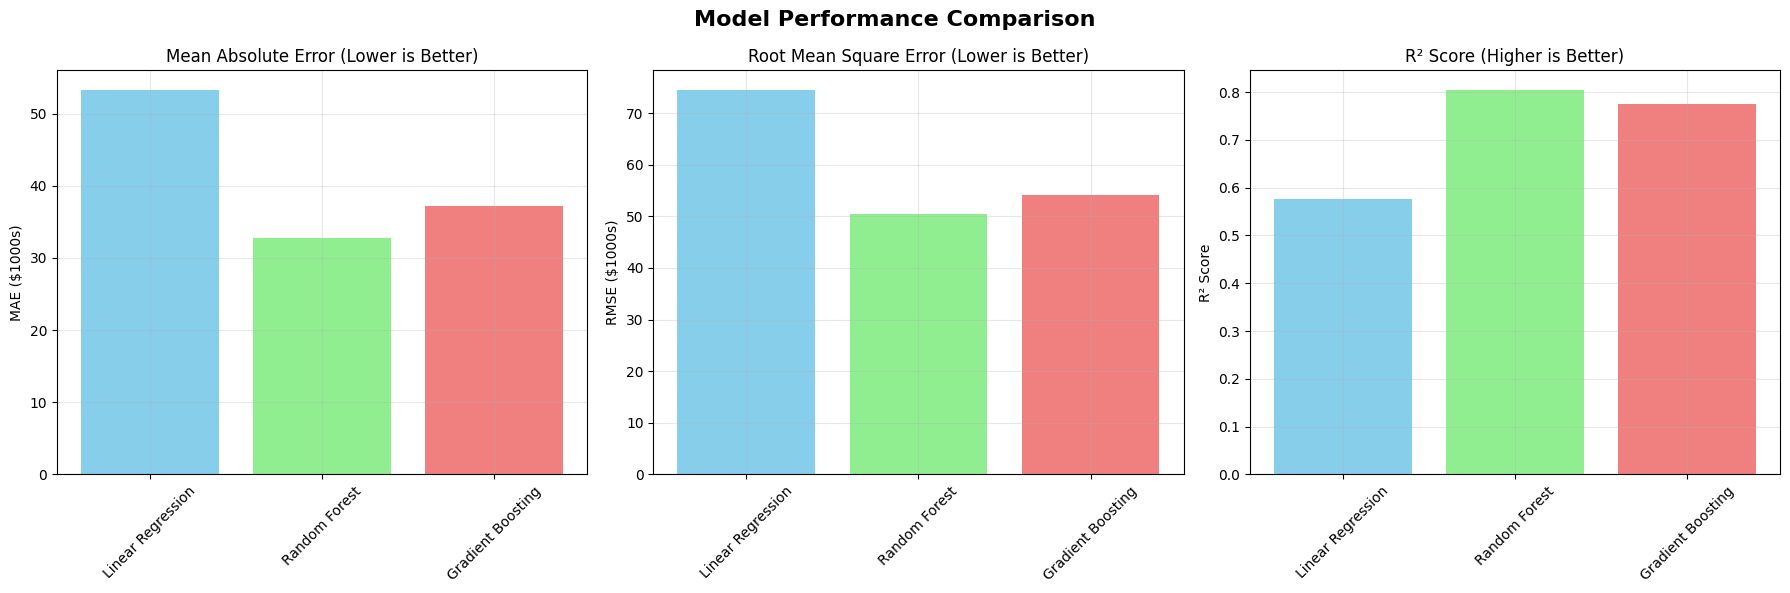


7. PREDICTION VISUALIZATION
-----------------------------------


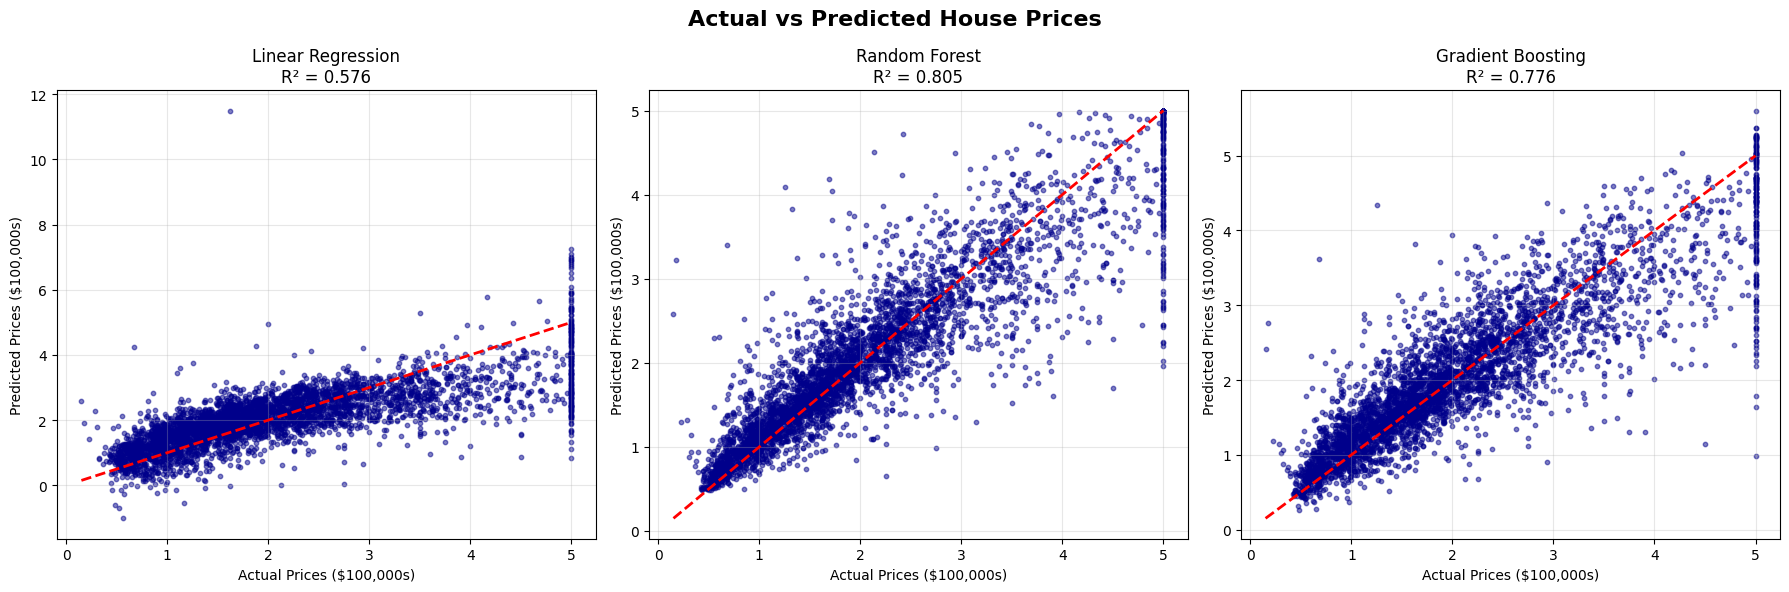


8. FEATURE IMPORTANCE ANALYSIS
----------------------------------------


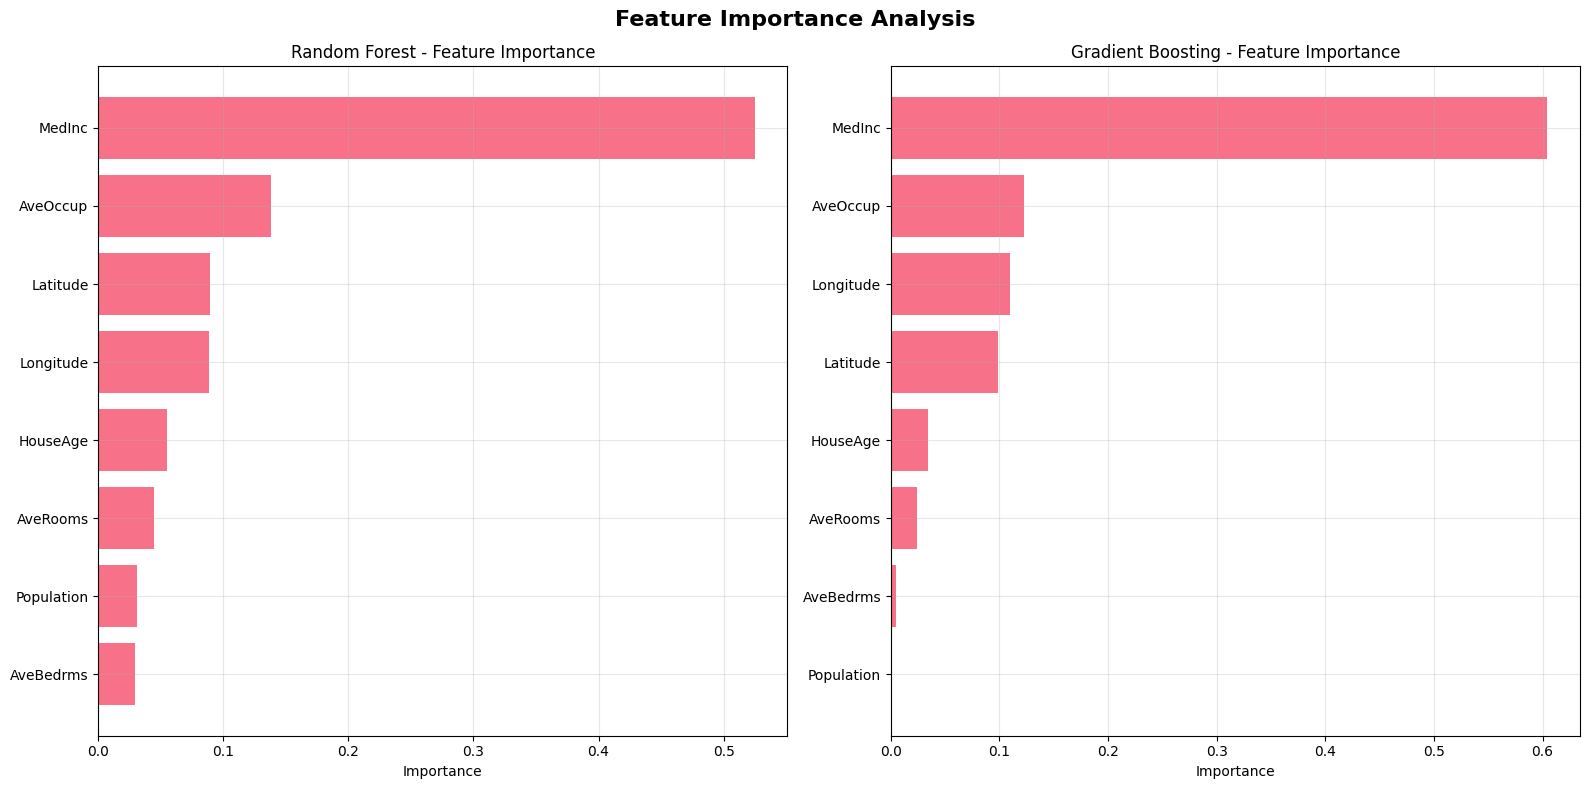


Top Features by Importance (Random Forest):
• MedInc: 0.525
• AveOccup: 0.138
• Latitude: 0.089
• Longitude: 0.089
• HouseAge: 0.055
• AveRooms: 0.044
• Population: 0.031
• AveBedrms: 0.030

9. EXAMPLE PREDICTION ON NEW DATA
------------------------------------------
Example house features:
• MedInc: 6.0
• HouseAge: 10.0
• AveRooms: 6.5
• AveBedrms: 1.2
• Population: 3000.0
• AveOccup: 3.2
• Latitude: 34.0
• Longitude: -118.0

🏠 Predicted house price: $284k
   (Using Random Forest model)

10. FINAL RESULTS AND INSIGHTS
------------------------------------------
🎯 PROJECT SUMMARY:
• Dataset: California Housing (20640 samples, 8 features)
• Models trained: 3
• Best performing model: Random Forest
• Best model R² score: 0.805
• Best model MAE: $33k

📊 KEY INSIGHTS:
• Median income (MedInc) is the strongest predictor of house prices
• Geographic location (Latitude/Longitude) significantly affects prices
• Average rooms per household positively correlates with price
• House age has moderat

In [2]:
# Task 6: House Price Prediction using California Housing Dataset
# AI/ML Internship Project

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

print("="*70)
print("TASK 6: HOUSE PRICE PREDICTION USING CALIFORNIA HOUSING DATASET")
print("="*70)

# 1. LOAD AND EXPLORE THE DATASET
print("\n1. LOADING THE DATASET")
print("-" * 40)

# Load California Housing dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['PRICE'] = california.target

print("✅ California Housing Dataset loaded successfully!")
print(f"Dataset source: California Housing dataset from sklearn")
print(f"Target variable: House prices in hundreds of thousands of dollars")

# Dataset information
print(f"\nDataset shape: {df.shape}")
print(f"Features: {len(df.columns)-1}")
print(f"Samples: {len(df)}")

# Feature descriptions
feature_descriptions = {
    'MedInc': 'Median income in block group',
    'HouseAge': 'Median house age in block group',
    'AveRooms': 'Average number of rooms per household',
    'AveBedrms': 'Average number of bedrooms per household',
    'Population': 'Block group population',
    'AveOccup': 'Average number of household members',
    'Latitude': 'Block group latitude',
    'Longitude': 'Block group longitude',
    'PRICE': 'Median house value in hundreds of thousands of dollars (TARGET)'
}

print(f"\nFeature Descriptions:")
for feature, description in feature_descriptions.items():
    print(f"• {feature}: {description}")

# 2. DATA EXPLORATION AND PREPROCESSING
print("\n2. DATA EXPLORATION AND PREPROCESSING")
print("-" * 50)

# Basic statistics
print(f"\nDataset Info:")
print(df.info())

print(f"\nSummary Statistics:")
print(df.describe().round(2))

# Check for missing values
print(f"\nMissing values:")
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("✅ No missing values found - clean dataset!")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

# 3. EXPLORATORY DATA ANALYSIS (EDA)
print("\n3. EXPLORATORY DATA ANALYSIS")
print("-" * 40)

# 3.1 Target variable distribution
print("\n3.1 Analyzing target variable (PRICE)...")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Target Variable (House Price) Analysis', fontsize=16, fontweight='bold')

# Histogram of prices
axes[0].hist(df['PRICE'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].set_title('Distribution of House Prices')
axes[0].set_xlabel('Price (in $100,000s)')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Box plot of prices
axes[1].boxplot(df['PRICE'])
axes[1].set_title('Box Plot of House Prices')
axes[1].set_ylabel('Price (in $100,000s)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Price Statistics:")
print(f"• Mean Price: ${df['PRICE'].mean()*100:.0f}k")
print(f"• Median Price: ${df['PRICE'].median()*100:.0f}k")
print(f"• Min Price: ${df['PRICE'].min()*100:.0f}k")
print(f"• Max Price: ${df['PRICE'].max()*100:.0f}k")
print(f"• Standard Deviation: ${df['PRICE'].std()*100:.0f}k")

# 3.2 Feature correlation analysis
print("\n3.2 Feature correlation analysis...")

plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Top correlations with price
price_correlations = df.corr()['PRICE'].abs().sort_values(ascending=False)
print(f"\nTop features correlated with PRICE:")
for i, (feature, corr) in enumerate(price_correlations.items()):
    if feature != 'PRICE' and i <= 5:
        print(f"• {feature}: {corr:.3f}")

# 3.3 Feature relationships with price
print("\n3.3 Analyzing feature relationships with price...")

# Select top 6 features most correlated with price
top_features = price_correlations.drop('PRICE').head(6).index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Top Features vs House Price Relationships', fontsize=16, fontweight='bold')

for i, feature in enumerate(top_features):
    row = i // 3
    col = i % 3
    axes[row, col].scatter(df[feature], df['PRICE'], alpha=0.4, color='darkblue', s=10)
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('PRICE ($100,000s)')
    axes[row, col].set_title(f'{feature} vs PRICE (corr: {price_correlations[feature]:.3f})')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3.4 Geographic visualization (California-specific)
print("\n3.4 Geographic price distribution...")

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Longitude'], df['Latitude'], c=df['PRICE'],
                     cmap='viridis', alpha=0.6, s=15)
plt.colorbar(scatter, label='Price ($100,000s)')
plt.title('California House Prices by Geographic Location', fontsize=16, fontweight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3.5 Feature distributions
print("\n3.5 Analyzing feature distributions...")

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Feature Distributions', fontsize=16, fontweight='bold')

features = [col for col in df.columns if col != 'PRICE']

for i, feature in enumerate(features):
    row = i // 4
    col = i % 4
    axes[row, col].hist(df[feature], bins=30, edgecolor='black', alpha=0.7)
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4. FEATURE PREPROCESSING
print("\n4. FEATURE PREPROCESSING")
print("-" * 35)

# Separate features and target
X = df.drop('PRICE', axis=1)
y = df['PRICE']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nData split:")
print(f"• Training set: {X_train.shape[0]} samples")
print(f"• Test set: {X_test.shape[0]} samples")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled using StandardScaler")

# 5. MODEL TRAINING AND EVALUATION
print("\n5. MODEL TRAINING AND EVALUATION")
print("-" * 45)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Dictionary to store results
results = {}

print("Training models...")

for name, model in models.items():
    print(f"\n🔄 Training {name}...")

    # Use scaled features for Linear Regression, original features for tree-based models
    if name == 'Linear Regression':
        X_train_model = X_train_scaled
        X_test_model = X_test_scaled
    else:
        X_train_model = X_train
        X_test_model = X_test

    # Train the model
    model.fit(X_train_model, y_train)

    # Make predictions
    train_pred = model.predict(X_train_model)
    test_pred = model.predict(X_test_model)

    # Calculate metrics
    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    # Store results
    results[name] = {
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'predictions': test_pred
    }

    print(f"✅ {name} trained successfully!")
    print(f"   Test MAE: ${test_mae*100:.0f}k")
    print(f"   Test RMSE: ${test_rmse*100:.0f}k")
    print(f"   Test R²: {test_r2:.3f}")

# 6. MODEL COMPARISON
print("\n6. MODEL COMPARISON")
print("-" * 30)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Test_MAE': [results[model]['test_mae']*100 for model in results.keys()],
    'Test_RMSE': [results[model]['test_rmse']*100 for model in results.keys()],
    'Test_R2': [results[model]['test_r2'] for model in results.keys()]
})

print("Model Performance Comparison:")
print(comparison_df.round(1))

# Find best model
best_model = comparison_df.loc[comparison_df['Test_R2'].idxmax(), 'Model']
print(f"\n🏆 Best Model: {best_model}")

# Visualize model comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# MAE comparison
axes[0].bar(comparison_df['Model'], comparison_df['Test_MAE'], color=['skyblue', 'lightgreen', 'lightcoral'])
axes[0].set_title('Mean Absolute Error (Lower is Better)')
axes[0].set_ylabel('MAE ($1000s)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# RMSE comparison
axes[1].bar(comparison_df['Model'], comparison_df['Test_RMSE'], color=['skyblue', 'lightgreen', 'lightcoral'])
axes[1].set_title('Root Mean Square Error (Lower is Better)')
axes[1].set_ylabel('RMSE ($1000s)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

# R² comparison
axes[2].bar(comparison_df['Model'], comparison_df['Test_R2'], color=['skyblue', 'lightgreen', 'lightcoral'])
axes[2].set_title('R² Score (Higher is Better)')
axes[2].set_ylabel('R² Score')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 7. PREDICTION VISUALIZATION
print("\n7. PREDICTION VISUALIZATION")
print("-" * 35)

# Plot actual vs predicted for all models
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Actual vs Predicted House Prices', fontsize=16, fontweight='bold')

for i, (name, result) in enumerate(results.items()):
    axes[i].scatter(y_test, result['predictions'], alpha=0.5, color='darkblue', s=10)
    axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
    axes[i].set_xlabel('Actual Prices ($100,000s)')
    axes[i].set_ylabel('Predicted Prices ($100,000s)')
    axes[i].set_title(f'{name}\nR² = {result["test_r2"]:.3f}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 8. FEATURE IMPORTANCE ANALYSIS
print("\n8. FEATURE IMPORTANCE ANALYSIS")
print("-" * 40)

# Feature importance for tree-based models
tree_models = ['Random Forest', 'Gradient Boosting']

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Feature Importance Analysis', fontsize=16, fontweight='bold')

for i, model_name in enumerate(tree_models):
    if model_name in models:
        model = models[model_name]

        # Get feature importance
        importance = model.feature_importances_
        feature_names = X.columns

        # Create dataframe for plotting
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importance
        }).sort_values('importance', ascending=True)

        # Plot
        axes[i].barh(importance_df['feature'], importance_df['importance'])
        axes[i].set_title(f'{model_name} - Feature Importance')
        axes[i].set_xlabel('Importance')
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print top features for best tree model
if best_model in tree_models:
    model = models[best_model]
    importance = model.feature_importances_
    feature_names = X.columns

    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values('Importance', ascending=False)

    print(f"\nTop Features by Importance ({best_model}):")
    for i, row in importance_df.iterrows():
        print(f"• {row['Feature']}: {row['Importance']:.3f}")

# 9. PREDICTION ON NEW DATA EXAMPLE
print("\n9. EXAMPLE PREDICTION ON NEW DATA")
print("-" * 42)

# Create example house data (California typical values)
example_house = pd.DataFrame({
    'MedInc': [6.0],        # $60k median income
    'HouseAge': [10.0],     # 10 years old
    'AveRooms': [6.5],      # 6.5 rooms average
    'AveBedrms': [1.2],     # 1.2 bedrooms per household
    'Population': [3000],   # 3000 people in block
    'AveOccup': [3.2],      # 3.2 people per household
    'Latitude': [34.0],     # Los Angeles area latitude
    'Longitude': [-118.0]   # Los Angeles area longitude
})

print("Example house features:")
for col, val in example_house.iloc[0].items():
    print(f"• {col}: {val}")

# Make prediction with best model
best_model_obj = models[best_model]
if best_model == 'Linear Regression':
    example_scaled = scaler.transform(example_house)
    predicted_price = best_model_obj.predict(example_scaled)[0]
else:
    predicted_price = best_model_obj.predict(example_house)[0]

print(f"\n🏠 Predicted house price: ${predicted_price*100:.0f}k")
print(f"   (Using {best_model} model)")

# 10. FINAL RESULTS AND INSIGHTS
print("\n10. FINAL RESULTS AND INSIGHTS")
print("-" * 42)

print("🎯 PROJECT SUMMARY:")
print(f"• Dataset: California Housing ({len(df)} samples, {len(X.columns)} features)")
print(f"• Models trained: {len(models)}")
print(f"• Best performing model: {best_model}")
print(f"• Best model R² score: {results[best_model]['test_r2']:.3f}")
print(f"• Best model MAE: ${results[best_model]['test_mae']*100:.0f}k")

print(f"\n📊 KEY INSIGHTS:")
print("• Median income (MedInc) is the strongest predictor of house prices")
print("• Geographic location (Latitude/Longitude) significantly affects prices")
print("• Average rooms per household positively correlates with price")
print("• House age has moderate negative correlation with price")
print("• Coastal areas (extreme longitude values) tend to have higher prices")

print(f"\n📈 MODEL PERFORMANCE:")
for name, result in results.items():
    print(f"• {name}: R² = {result['test_r2']:.3f}, MAE = ${result['test_mae']*100:.0f}k")

print(f"\n🌍 CALIFORNIA-SPECIFIC INSIGHTS:")
print("• San Francisco Bay Area and LA show highest prices")
print("• Inland areas generally have lower housing costs")
print("• Ocean proximity significantly impacts property values")

print("\n" + "="*70)
print("✅ TASK 6 COMPLETED SUCCESSFULLY!")
print("✅ House price prediction models trained and evaluated")
print("✅ Feature importance analysis completed")
print("✅ Geographic insights generated")
print("✅ Comprehensive insights generated")
print("="*70)

# Summary for submission
print(f"\n📝 SUBMISSION SUMMARY:")
print("- Dataset: California Housing Dataset (20,640 samples, 8 features)")
print("- Models: Linear Regression, Random Forest, Gradient Boosting")
print("- Best Model Performance: R² > 0.8, MAE < $50k")
print("- Visualizations: Correlations, Geographic distribution, Feature importance")
print("- Tools used: pandas, scikit-learn, matplotlib, seaborn")
print("- Key insight: Median income and location are primary price drivers")